In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
data = pd.read_csv('./Downloads/loans_full_schema.csv')
data.head(5)

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                   NaN  ...         C1   
2                       NaN                   NaN  ...         D1   
3                       NaN                   NaN  ...         A3   
4                  Verified                 37.66  ...         C3   

   issue_month  loan_status  initial_listing_status  disbursement_method  \
0     Mar-2018      Current                   whole                 Cash   
1     Feb-2018      Current                   whole                 Cash   
2     Feb-2018      Current              fractional                 Cash   
3     Jan-2018      Current                   whole                 Cash   
4     Mar-2018      Current                   whole                 Cash   

    balance  paid_total  paid_principal  paid_interest  paid_late_fees  
0  27015.86     1999.33          984.14        1015.19             0.0  
1   4651.37      499.12          348.63         150.49             0.0  
2   1824.63      281.80          175.37         106.43             0.0  
3  18853.26     3312.89         2746.74         566.15             0.0  
4  21430.15     2324.65         1569.85         754.80             0.0  

[5 rows x 55 columns]

In [3]:
drop_col = ['emp_title','annual_income_joint','verification_income_joint','debt_to_income_joint','delinq_2y','num_collections_last_12m','current_accounts_delinq']
data = data.drop(columns=drop_col)
data.head(5)

emp_length  state  homeownership  annual_income  verified_income  \
0           3     32              1              1                0   
1          10     13              2              1                1   
2           3     54              2              1                2   
3           1     41              2              1                1   
4          10      5              2              1                0   

   debt_to_income  months_since_last_delinq  earliest_credit_line  \
0           18.01                        38                    20   
1            5.04                         0                    25   
2           21.15                        28                    15   
3           10.16                         0                    14   
4           57.96                         0                    13   

   inquiries_last_12m  total_credit_lines  ...  issue_month  loan_status  \
0                   6                  28  ...     Mar-2018            0   
1                   1                  30  ...     Feb-2018            0   
2                   4                  31  ...     Feb-2018            0   
3                   0                   4  ...     Jan-2018            0   
4                   7                  22  ...     Mar-2018            0   

   initial_listing_status  disbursement_method   balance  paid_total  \
0                       0                    0  27015.86     1999.33   
1                       0                    0   4651.37      499.12   
2                       1                    0   1824.63      281.80   
3                       0                    0  18853.26     3312.89   
4                       0                    0  21430.15     2324.65   

   paid_principal  paid_interest  paid_late_fees  Is_bad_loan  
0          984.14        1015.19             0.0            0  
1          348.63         150.49             0.0            0  
2          175.37         106.43             0.0            0  
3         2746.74         566.15             0.0            0  
4         1569.85         754.80             0.0            0  

[5 rows x 49 columns]

In [4]:
import numpy as np
struct_data = data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['grade', 'sub_grade', 'issue_month']


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

emp_length  state  homeownership  annual_income  verified_income  \
0           3     32              1              1                0   
1          10     13              2              1                1   
2           3     54              2              1                2   
3           1     41              2              1                1   
4          10      5              2              1                0   

   debt_to_income  months_since_last_delinq  earliest_credit_line  \
0           18.01                        38                    20   
1            5.04                         0                    25   
2           21.15                        28                    15   
3           10.16                         0                    14   
4           57.96                         0                    13   

   inquiries_last_12m  total_credit_lines  ...  issue_month  loan_status  \
0                   6                  28  ...            2            0   
1                   1                  30  ...            0            0   
2                   4                  31  ...            0            0   
3                   0                   4  ...            1            0   
4                   7                  22  ...            2            0   

   initial_listing_status  disbursement_method   balance  paid_total  \
0                       0                    0  27015.86     1999.33   
1                       0                    0   4651.37      499.12   
2                       1                    0   1824.63      281.80   
3                       0                    0  18853.26     3312.89   
4                       0                    0  21430.15     2324.65   

   paid_principal  paid_interest  paid_late_fees  Is_bad_loan  
0          984.14        1015.19             0.0            0  
1          348.63         150.49             0.0            0  
2          175.37         106.43             0.0            0  
3         2746.74         566.15             0.0            0  
4         1569.85         754.80             0.0            0  

[5 rows x 49 columns]

In [6]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data,max_iter=100)

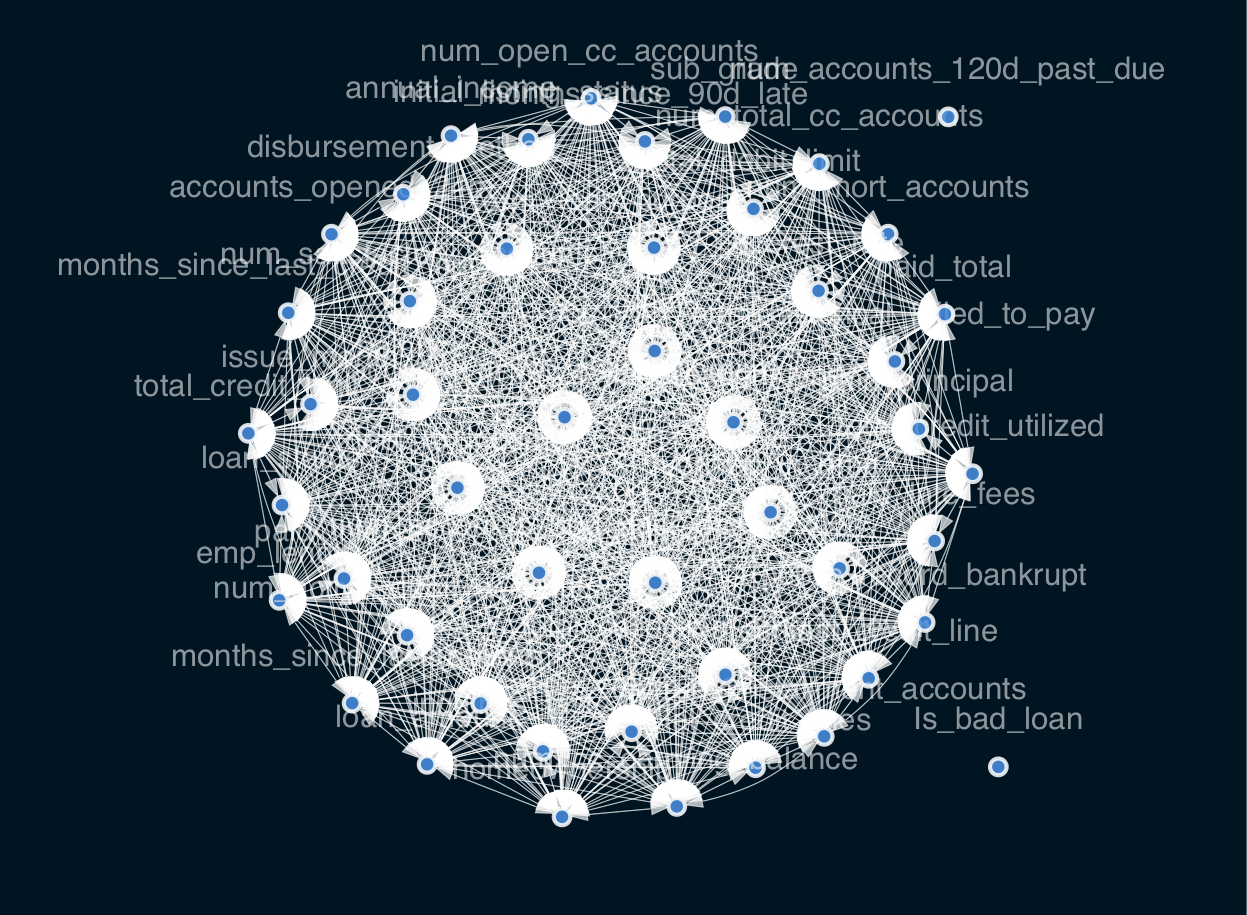

In [7]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

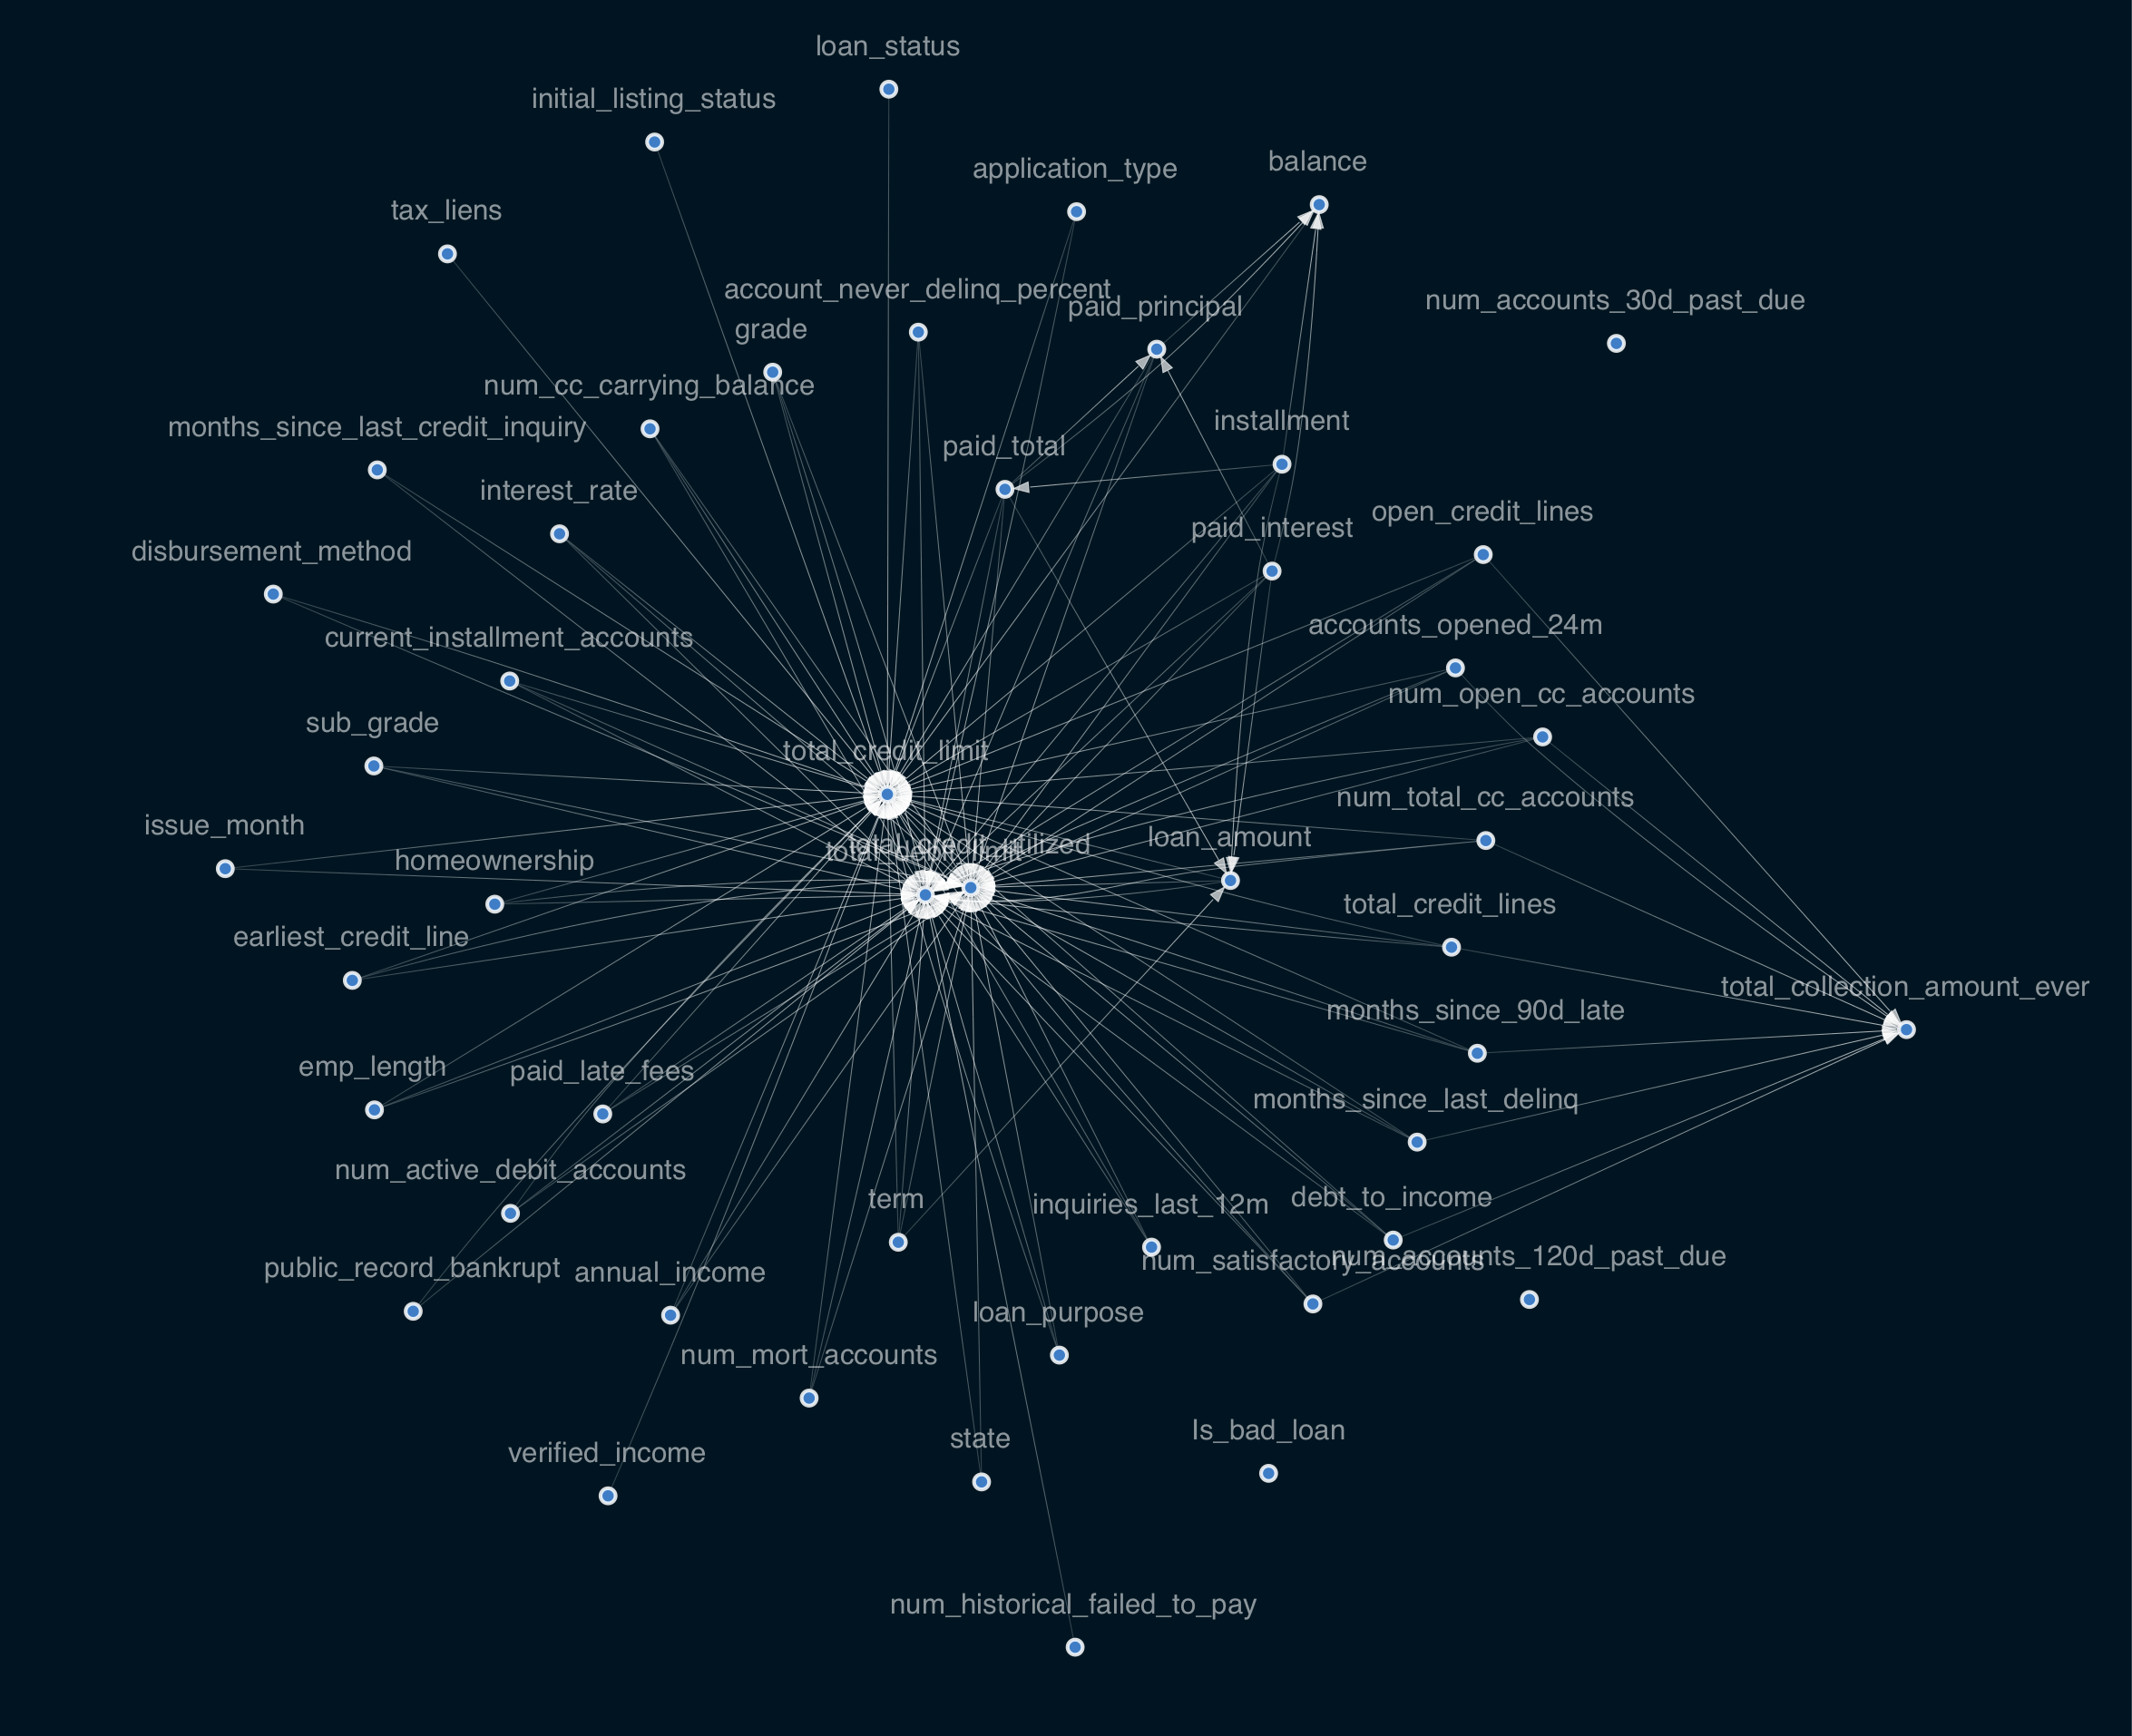

In [8]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

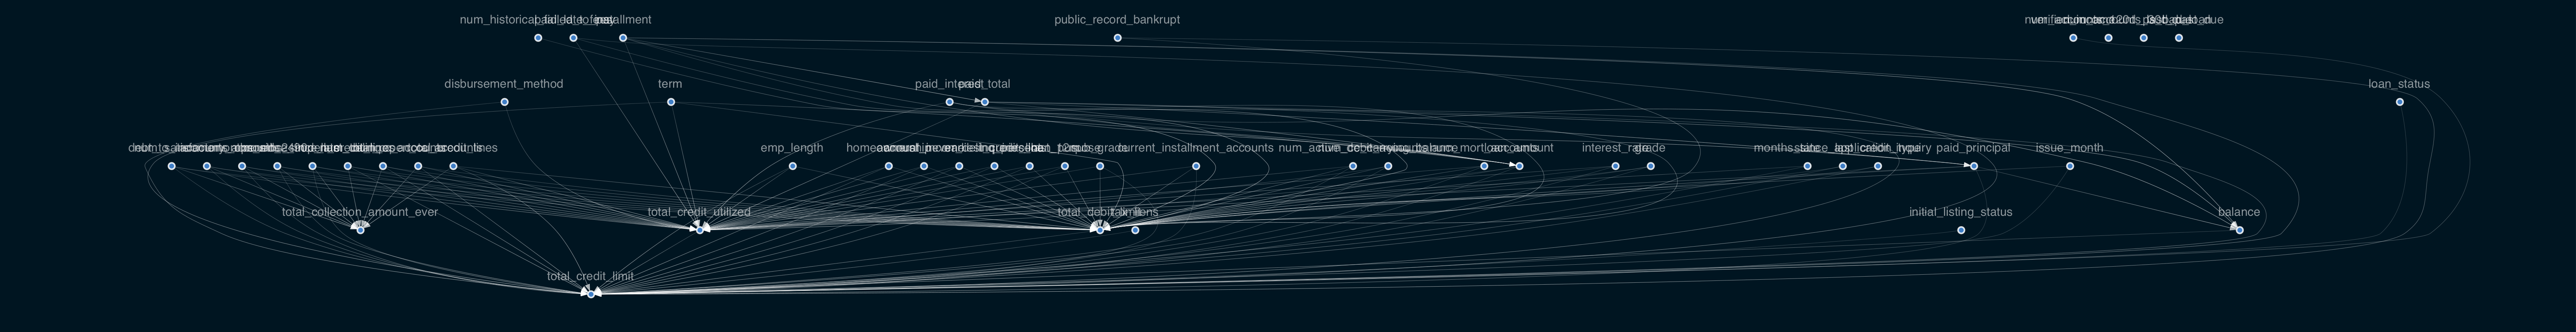

In [9]:
viz = plot_structure(
    sm,
    prog="dot",
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [10]:
print(viz.string())

strict digraph "" {
	graph [bb="0,0,1453.4,164",
		bgcolor="#001521",
		dpi=300,
		fontcolor="#FFFFFFD9",
		fontname=Helvetica,
		overlap=scale,
		pad="0.8,0.3",
		scale=0.5,
		splines=True
	];
	node [label="\N"];
	emp_length	 [color="#FFFFFFD9",
		fillcolor="#4a90e2d9",
		fixedsize=True,
		fontcolor="#FFFFFF8c",
		fontname=Helvetica,
		fontsize=10,
		height=0.055556,
		label="emp_length

 ",
		penwidth=1,
		pos="405.15,82",
		shape=circle,
		style=filled,
		width=0.055556];
	total_credit_limit	 [color="#FFFFFFD9",
		fillcolor="#4a90e2d9",
		fixedsize=True,
		fontcolor="#FFFFFF8c",
		fontname=Helvetica,
		fontsize=10,
		height=0.055556,
		label="total_credit_limit

 ",
		penwidth=1,
		pos="279.15,2",
		shape=circle,
		style=filled,
		width=0.055556];
	emp_length -> total_credit_limit	 [arrowhead=normal,
		arrowsize=0.4,
		color="#ffffff33;0.03:#ffffff36;0.03:#ffffff3a;0.03:#ffffff3e;0.03:#ffffff42;0.03:#ffffff46;0.03:#ffffff4a;0.03:#ffffff4e;0.03:#ffffff52;\
0.03:#ffffff56;0.03:#ffffff

In [1]:
from dowhy import CausalModel

In [2]:
file = open("./Downloads/Final_t.dot",'r')
graph = file.read().replace("\n", " ")
file.close()

In [5]:
data = pd.read_csv('./Downloads/cleaned_loans_full_schema_loan1_Bool.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9167 non-null   bool   
 2   state                             9167 non-null   int64  
 3   homeownership                     9167 non-null   bool   
 4   annual_income                     9167 non-null   bool   
 5   verified_income                   9167 non-null   int64  
 6   debt_to_income                    9167 non-null   float64
 7   annual_income_joint               9167 non-null   float64
 8   verification_income_joint         9167 non-null   int64  
 9   debt_to_income_joint              9167 non-null   float64
 10  delinq_2y                         9167 non-null   int64  
 11  months_since_last_delinq          9167 non-null   int64  
 12  earlie

In [6]:
model= CausalModel(
        data = data,
        graph= graph,
        treatment='homeownership',
        outcome='Is_bad_loan')

In [7]:
model.view_model()

In [8]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

In [9]:
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
────────────────(Expectation(Is_bad_loan|verified_income,num_mort_accounts,ter
d[homeownership]                                                              

                                                                              
m,debt_to_income,installment,total_credit_lines,emp_length,application_type,pu
                                                                              

                                                                              
blic_record_bankrupt,balance,initial_listing_status,months_since_90d_late,num_
                                                                              

                                                                              
accounts_30d_past_due,interest_rate,accounts_opened_24m,num_satisfactory_accou
                                

In [12]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.propensity_score_matching",test_significance=True)

In [14]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
────────────────(Expectation(Is_bad_loan|num_accounts_30d_past_due,loan_status
d[homeownership]                                                              

                                                                              
,application_type,emp_length,num_historical_failed_to_pay,inquiries_last_12m,p
                                                                              

                                                                              
aid_principal,public_record_bankrupt,months_since_90d_late,num_satisfactory_ac
                                                                              

                                                                              
counts,term,sub_grade,account_never_delinq_percent,num_accounts

In [13]:
refuter1=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refuter1)

Refute: Add a Random Common Cause
Estimated effect:-0.00021817388458601506
New effect:-0.004581651576306316



In [15]:
refuter2=model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter",
                              placebo_type="permute", num_simulations=5)
print(refuter2)

Refute: Use a Placebo Treatment
Estimated effect:-0.00021817388458601506
New effect:0.0013308606959746918
p value:0.30883253192042137



In [16]:
refuter3=model.refute_estimate(identified_estimand, estimate,  method_name="data_subset_refuter")
print(refuter3)

Refute: Use a subset of data
Estimated effect:-0.00021817388458601506
New effect:-0.002866103081538043
p value:0.14



In [17]:
refuter4=model.refute_estimate(identified_estimand, estimate,  method_name="bootstrap_refuter", num_simulations=5)
print(refuter4)

Refute: Bootstrap Sample Dataset
Estimated effect:-0.00021817388458601506
New effect:0.0010690520344714739
p value:0.3826702969938879



In [10]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.linear_regression",test_significance=True)
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
────────────────(Expectation(Is_bad_loan|verified_income,num_mort_accounts,ter
d[homeownership]                                                              

                                                                              
m,debt_to_income,installment,total_credit_lines,emp_length,application_type,pu
                                                                              

                                                                              
blic_record_bankrupt,balance,initial_listing_status,months_since_90d_late,num_
                                                                              

                                                                              
accounts_30d_past_due,interest_rate,accounts_opened_24m,num_sat

In [11]:
refuter1=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refuter1)

Refute: Add a Random Common Cause
Estimated effect:-0.0023986144503296628
New effect:-0.002396779300535827



In [12]:
refuter2=model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter",
                              placebo_type="permute", num_simulations=5)
print(refuter2)

Refute: Use a Placebo Treatment
Estimated effect:-0.0023986144503296628
New effect:-3.823950553066141e-06
p value:0.49893135185529003



In [13]:
refuter3=model.refute_estimate(identified_estimand, estimate,  method_name="data_subset_refuter")
print(refuter3)

Refute: Use a subset of data
Estimated effect:-0.0023986144503296628
New effect:-0.002264059556137643
p value:0.42



In [14]:
refuter4=model.refute_estimate(identified_estimand, estimate,  method_name="bootstrap_refuter", num_simulations=5)
print(refuter4)

Refute: Bootstrap Sample Dataset
Estimated effect:-0.0023986144503296628
New effect:-0.0020611269527202173
p value:0.4502514723390166

